In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr
from IPython.display import display

pd.options.display.float_format = '{:,.2f}'.format

# 1. Import the Data

In [15]:
# Load the dataset
df = pd.read_csv('all_data.csv')

# Ensure correct data types
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')
df['Life expectancy at birth (years)'] = pd.to_numeric(df['Life expectancy at birth (years)'], errors='coerce')
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')

# Fixing column name mismatch
df.rename(columns={'Life expectancy at birth (years)': 'Life Expectancy'}, inplace=True)

df.sample(5)

,Country,Year,Life Expectancy,GDP
88,Zimbabwe,2008,48.20,"4,415,702,800.00"
12,Chile,2012,79.90,"267,122,000,000.00"
10,Chile,2010,79.10,"218,538,000,000.00"
9,Chile,2009,79.30,"172,389,000,000.00"
49,Mexico,2001,75.00,"724,704,000,000.00"


# 2. EDA
## 2.1. Overview

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          96 non-null     object 
 1   Year             96 non-null     int64  
 2   Life Expectancy  96 non-null     float64
 3   GDP              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,96.00,"2,007.50",4.63,"2,000.00","2,003.75","2,007.50","2,011.25","2,015.00"
Life Expectancy,96.00,72.79,10.67,44.30,74.47,76.75,78.90,81.00
GDP,96.00,"3,880,498,570,768.40","5,197,561,310,975.92","4,415,702,800.00","173,301,750,000.00","1,280,220,000,000.00","4,067,510,000,000.00","18,100,000,000,000.00"


## 2.2. Calculating Average Life Expectancy and GDP by Country

In [32]:
country_stats = df.groupby('Country')[['Life Expectancy', 'GDP']].mean().sort_values(by='Life Expectancy', ascending=False)
print("\nAverage Life Expectancy and GDP by Country:")
print(country_stats)


Average Life Expectancy and GDP by Country:
                          Life Expectancy                   GDP
Country                                                        
Germany                             79.66  3,094,775,625,000.00
Chile                               78.94    169,788,845,015.31
United States of America            78.06 14,075,000,000,000.00
Mexico                              75.72    976,650,625,000.00
China                               74.26  4,957,713,750,000.00
Zimbabwe                            50.09      9,062,579,595.06


## 2.3. Life Expectancy Over Time
Let's visualize how life expectancy has changed over the years for different countries.

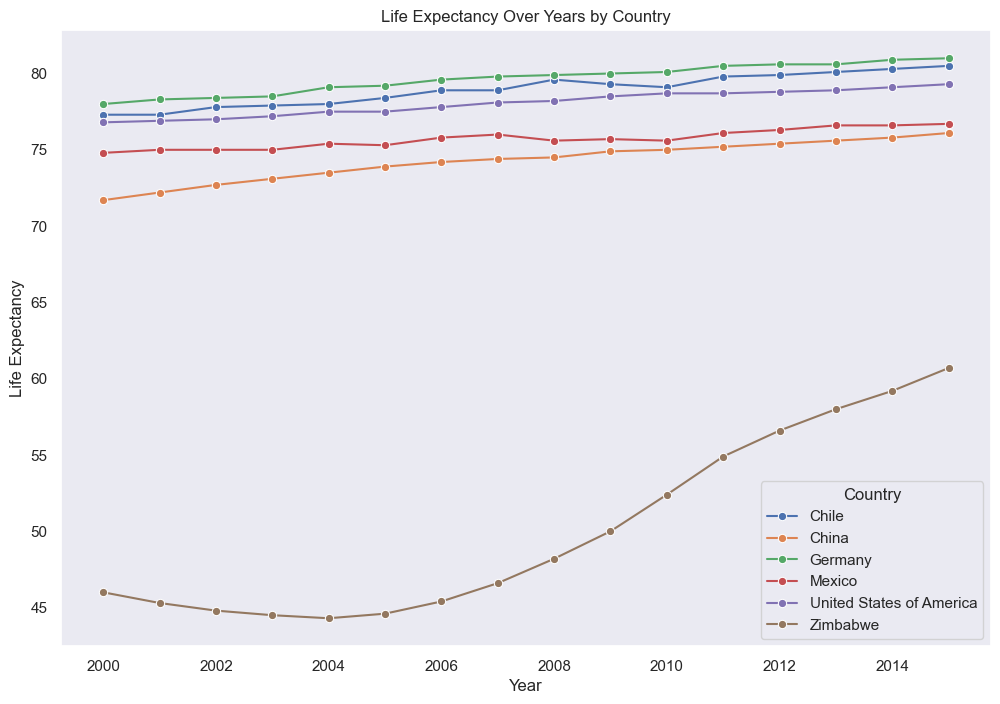

In [22]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Life Expectancy', hue='Country', data=df, marker='o')
plt.title('Life Expectancy Over Years by Country')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.show()

## 2.4. GDP Over Time
A visualization of GDP changes over the years for different countries.

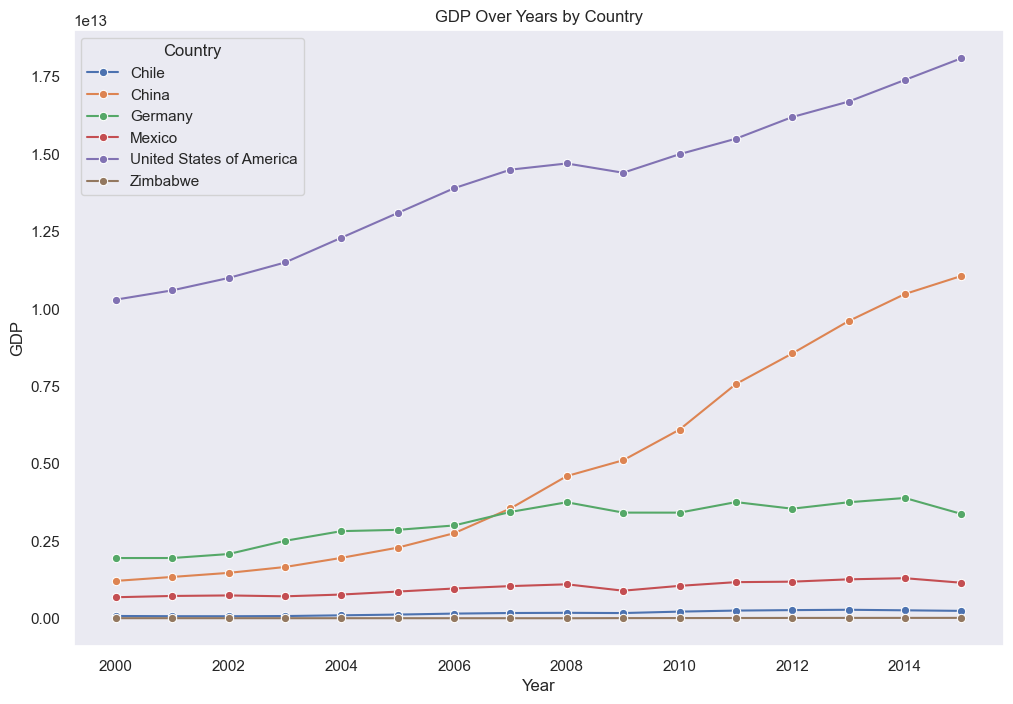

In [23]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='GDP', hue='Country', data=df, marker='o')
plt.title('GDP Over Years by Country')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.show()

## 2.5. Relationship between GDP and Life Expectancy

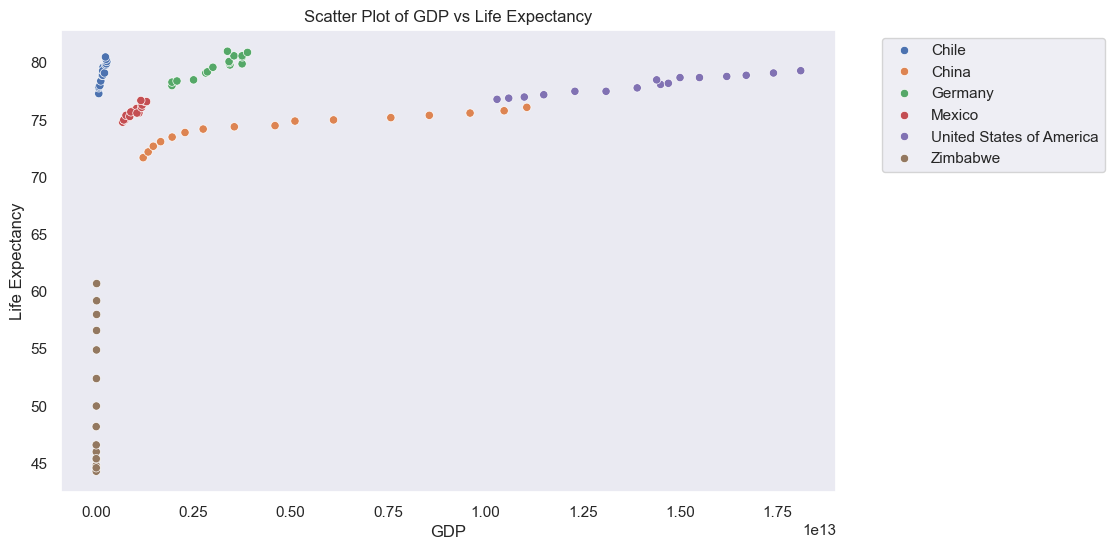

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP', y='Life Expectancy', hue='Country', data=df)
plt.title('Scatter Plot of GDP vs Life Expectancy')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Statistical Analysis
## 3.1. Correlation Analysis
Let's examine the correlation between GDP and life expectancy.

In [29]:
# Correlation between GDP and Life Expectancy (Pearson and Spearman)
pearson_corr, pearson_p = pearsonr(df['GDP'], df['Life Expectancy'])
spearman_corr, spearman_p = spearmanr(df['GDP'], df['Life Expectancy'])

print(f"Pearson correlation between GDP and Life Expectancy: {pearson_corr:.2f} (p-value: {pearson_p:.5f})")
print(f"Spearman correlation between GDP and Life Expectancy: {spearman_corr:.2f} (p-value: {spearman_p:.5f})")

Pearson correlation between GDP and Life Expectancy: 0.34 (p-value: 0.00062)
Spearman correlation between GDP and Life Expectancy: 0.45 (p-value: 0.00000)


## 3.2 Average GDP by Country

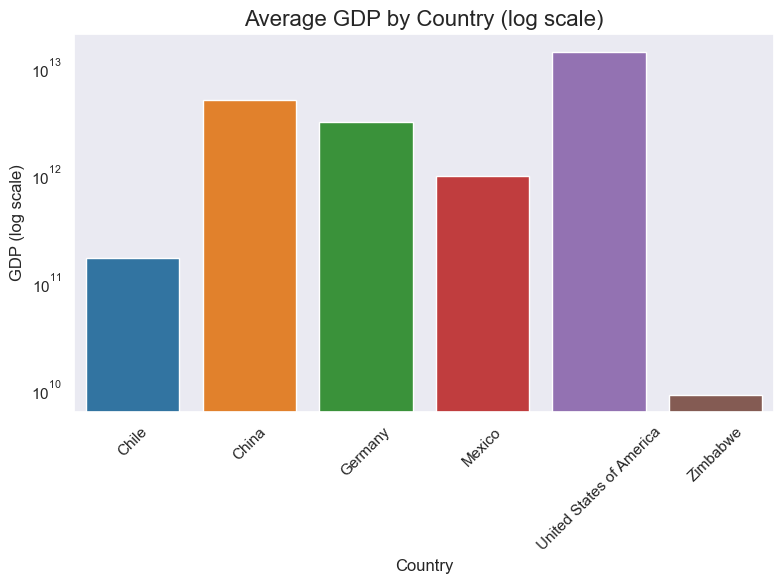

In [57]:
# Create a list of colors using a colormap
colors = sns.color_palette("tab10", len(country_stats))

# Plot
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    hue=country_stats.index,
    x=country_stats.index,
    y=country_stats['GDP'],
    palette=colors,
    dodge=False,
    legend=False
)

# Set y-axis to logarithmic scale
ax.set_yscale('log')

plt.title('Average GDP by Country (log scale)', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('GDP (log scale)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 3.3 Correlation Matrix

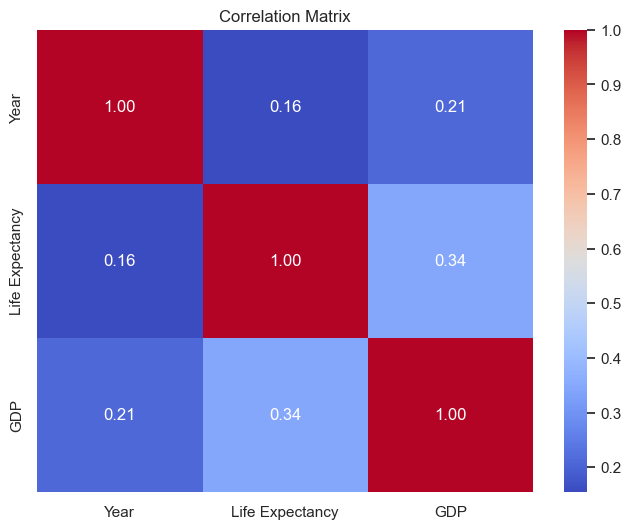

In [59]:
# Correlation analysis (only use numeric columns)
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation = numeric_df.corr()

# Visualization of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Summary of Analysis: Life Expectancy and GDP 

#### Key Points:
1. **Descriptive Statistics:**
   - Life expectancy ranged significantly across countries and years, showing variations in health and living conditions.
   - GDP values varied considerably, reflecting stark economic differences between countries.

2. **Trends Over Time:**
   - On average, life expectancy tended to increase over the years for most countries, indicating overall improvements in healthcare and quality of life.
   - GDP generally showed an upward trend, though some countries experienced economic fluctuations or stagnation during certain periods.

3. **Relationship Between GDP and Life Expectancy:**
   - A positive correlation was observed between GDP and life expectancy across countries, indicating that higher economic prosperity is generally associated with longer life expectancy.
   - **Pearson Correlation Coefficient** revealed a moderate to strong linear relationship between GDP and life expectancy for most countries.
   - **Spearman Correlation Coefficient** reinforced the association, suggesting a consistent monotonic relationship, even when the data was nonlinear.

4. **Visualization Insights:**
   - Scatter plots showed clustering of countries with similar GDP and life expectancy levels, highlighting regional or economic groupings.
   - Box plots indicated lower income countries had more variability in life expectancy, whereas wealthier countries displayed more stability.
   - Line plots revealed steady improvements in life expectancy for most developed nations, alongside economic growth.

5. **Country-Specific Findings:**
   - Developed countries exhibited both higher GDP levels and higher average life expectancy.
   - Developing nations showed more varied trends, with some improving steadily while others lagged behind.
   - Standard deviation analysis highlighted that life expectancy in lower-income countries was more volatile over time.

#### Discoveries:
- Economic growth (higher GDP) is strongly linked to improvements in life expectancy on a global scale.
- The relationship is not strictly linear; diminishing returns on life expectancy improvements are observed at higher GDP levels.
- Economic inequalities between countries significantly impact health outcomes, as seen in the wide life expectancy range in low-GDP nations.
- External factors, such as policy, healthcare systems, and geopolitical stability, likely mediate the strength of this relationship.

These findings underscore the importance of sustained economic development and policy interventions to improve both GDP and life expectancy, particularly in lower-income regions.